### CODE FROM https://cocalc.com/share/public_paths/7557a5ac1c870f1ec8f01271959b16b49df9d087/13-Smoothing.ipynb

In [1]:
def rts_smoother(Xs, Ps, F, Q):
    n, dim_x, _ = Xs.shape
    
    # smoother gain
    K = zeros((n,dim_x, dim_x))
    x, P = Xs.copy(), Ps.copy()

    for k in range(n-2,-1,-1):
        P_pred = dot(F, P[k]).dot(F.T) + Q

        K[k]  = dot(P[k], F.T).dot(inv(P_pred))
        x[k] += dot(K[k], x[k+1] - dot(F, x[k]))
        P[k] += dot(K[k], P[k+1] - P_pred).dot(K[k].T)
    return (x, P, K)

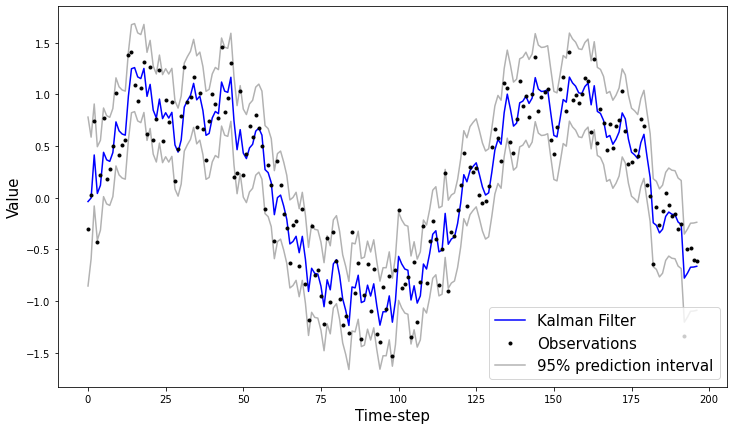

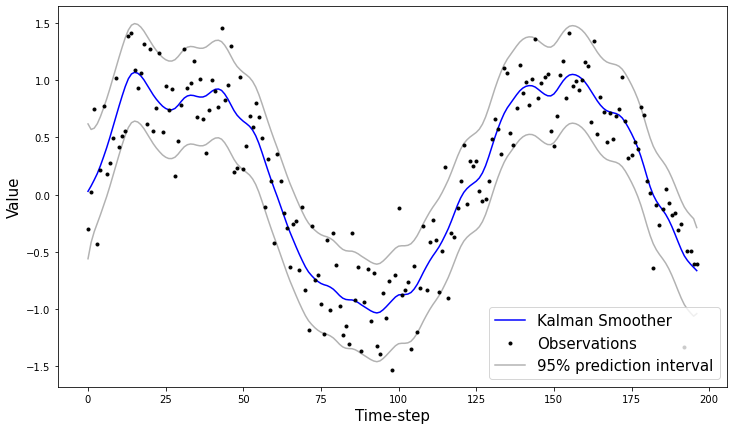

In [92]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

def plot_rts(noise, Q=0.01, show_velocity=False):
    random.seed(123)
    fk = KalmanFilter(dim_x=2, dim_z=1) #.rts_smoother(#.batch_filter()

    fk.x = np.array([0., 1.])      # initial state (location and velocity)

    fk.F = np.array([[1., 1.],
                     [0., 1.]])    # state transition matrix

    fk.H = np.array([[1., 0.]])    # Measurement function
    fk.P = 10.                     # covariance matrix
    fk.R = noise                   # state uncertainty
    fk.Q = Q                       # process uncertainty

    # create noisy data
    zs = np.sin(np.linspace(0,10, 200)) + random.normal(0, noise, 200)

    # filter data with Kalman filter, then run smoother on it
    mu, cov, mu_pred, cov_pred = fk.batch_filter(zs)
    M,P,C, cov_pred_smooth = fk.rts_smoother(mu, cov)
    
    std_filter = np.sqrt(cov_pred[:, 1, 1])
    std_smoother = np.sqrt(cov_pred_smooth[:, 1, 1])
    
    

    # plot data
    if show_velocity:
        index = 1
        print('gu')
    else:
        index = 0
    
    plt.figure(figsize= (12,7))
    plt.plot(mu[3:, index], c='b', label='Kalman Filter')
    plt.plot(zs[3:], 'k.', label = 'Observations')
    plt.plot(mu[3:, index] + 2 * std_filter[3:], c = 'k', alpha = 0.3, label = '95% prediction interval' )
    plt.plot(mu[3:, index] - 2 * std_filter[3:], c = 'k', alpha = 0.3 )
    plt.legend(loc=4, fontsize = 15)
    plt.xlabel('Time-step', fontsize = 15)
    plt.ylabel('Value', fontsize = 15)
    plt.savefig('../figures/filter_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize= (12,7))
    plt.plot(M[3:, index], c='b', label='Kalman Smoother')
    plt.plot(zs[3:], 'k.', label = 'Observations')
    plt.plot(M[3:, index] + 2 * std_smoother[3:], c = 'k', alpha = 0.3, label = '95% prediction interval')
    plt.plot(M[3:, index] - 2 * std_smoother[3:], c = 'k', alpha = 0.3 )
    plt.xlabel('Time-step', fontsize = 15)
    plt.ylabel('Value', fontsize = 15)
    plt.legend(loc=4, fontsize = 15)
    plt.savefig('../figures/smoother_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
plot_rts(.3)